data wrangling of stock market




In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import csv
import glob
import openpyxl

collection of data through web scraping:-

In [ ]:
# trying to access the each stock link from most-active stock list in a website
stocks_url = 'https://www.moneycontrol.com/stocks/marketstats/bse-mostactive-stocks/bse-100-1/'

response = requests.get(stocks_url)

response.status_code

200

In [ ]:
doc = BeautifulSoup(response.text, 'lxml')
doc

<!DOCTYPE html>
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Low Price High Volume Stocks/Shares, Low Price High Volume Shares/Stocks, High Volume Low Price Stocks/Shares</title>
<meta content="Find all Low Price High Volume Stocks, Low Price High Volume Shares, High Volume Low Price Stocks" name="description"/>
<meta content="Low Price High Volume Stocks, Low Price High Volume Shares, High Volume Low Price Stocks" name="keywords"/>
<!-- common_includefiles_v2.php - Revamp MCI  -->
<script src="https://stat2.moneycontrol.com/mcjs/common/https_mc_common.js" type="text/javascript"></script>
<script src="https://stat2.moneycontrol.com/mcjs/common/rhs_widgets.js?v=0.3" type="text/javascript"></script>
<link href="https://stat2.moneycontrol.com/mccss/common/newrhs_widget.css?v=0.5" rel="stylesheet" type="text/css"/>
<link href="https://stat2.moneycontrol.com/mccss/marketstats/https_stages_style.css" rel="stylesheet" type="text/css"/>
<script lang

In [ ]:
table=doc.find_all('td',class_='PR')
table

[<td class="PR" width="600"><span class="gld13 disin"><a href="http://www.moneycontrol.com/india/stockpricequote/bankspublicsector/statebankindia/SBI" style="color:#333">SBI</a>
 <div class="disin PR tipshow"><span class="ic_plusor"></span>
 <div class="stagetool wd190 dnone">
 <div class="PA5 CTR op_gl12">Add to</div>
 <div class="add_bubg CTR"> <a class="bl13 watch" href="javascript:;" onclick="javascript:chkbx_val('SBI','1');"><span class="ic_watchlist"></span>Watchlist</a> | <a class="bl13 port" href="javascript:;" onclick="javascript:chkbx_val('SBI','5');"><span class="ic_portfolio"></span>Portfolio</a> </div>
 <span class="arrwodn"></span> </div>
 </div>
 </span> <div class="MT5"><div class="disin PR tolhov">
 <span class="ic_graphsp ML5"></span>
 <div class="stagetool tooltip1 PB5 dnone">
 <div class="PA15">ACTIONS</div>
 <div class="PA10">
 <ul><li><span>SBI closes above 150-Day Moving Average of 563.36 today.</span></li><li><span>SBI closes below 150-Day Moving Average of 563.

In [ ]:
selection_class = 'gld13 disin'

span_tags = doc.find_all('span',{
                                    'class' : selection_class
})


In [ ]:
span0 = span_tags[0]

a_tags0 = span0.findChild()

a_tags0

<a href="http://www.moneycontrol.com/india/stockpricequote/bankspublicsector/statebankindia/SBI" style="color:#333">SBI</a>

In [ ]:
a_tags0.text

'SBI'

In [ ]:
a_url = a_tags0['href']
print(a_url)

http://www.moneycontrol.com/india/stockpricequote/bankspublicsector/statebankindia/SBI


In [ ]:
company_names = []
for span in span_tags:
    a = span
    a_tag = a.findChild().text
    company_names.append(a_tag)
print(company_names)
print(len(company_names))

['SBI', 'Tata Steel', 'Tata Steel', 'HDFC Bank', 'Reliance', 'Maruti Suzuki', 'Tata Motors', 'Tata Motors', 'Adani Enterpris', 'Adani Power', 'Coal India', 'Tata Power', 'Zomato', 'ITC', 'Infosys', 'Adani Ports', 'Wipro', 'Bank of Baroda', 'Hindalco', 'Kotak Mahindra', 'ICICI Bank', 'UltraTechCement', 'Bharat Elec', 'IOC', 'ONGC', 'Vedanta', 'Larsen', 'Shree Cements', 'NTPC', 'IRCTC', 'HUL', 'Pidilite Ind', 'DLF', 'Asian Paints', 'GAIL', 'TCS', 'Axis Bank', 'UPL', 'Zee Entertain', 'HCL Tech', 'Shriram Finance', 'Bajaj Finance', 'Tech Mahindra', 'JSW Steel', 'Power Grid Corp', 'LTIMindtree', 'Ashok Leyland', 'Grasim', 'Federal Bank', 'Bandhan Bank', 'IndusInd Bank', 'M&M', 'Britannia', 'HDFC Life', 'ACC', 'SRF', 'Eicher Motors', 'Ambuja Cements', 'MphasiS', 'Bharat Forge', 'Havells India', 'Titan Company', 'United Spirits', 'Bharti Airtel', 'Marico', 'Bajaj Auto', 'Dabur India', 'Bajaj Finserv', 'Bajaj Finserv', 'Interglobe Avi', 'Hero Motocorp', 'Tata Elxsi', 'Avenue Supermar', 'Varun 

In [ ]:
stock_url = []
for span in span_tags:
    a = span
    a_tag = a.findChild()
    a_url = a_tag['href']
    stock_url.append(a_url)
print(stock_url)

['http://www.moneycontrol.com/india/stockpricequote/bankspublicsector/statebankindia/SBI', 'http://www.moneycontrol.com/india/stockpricequote/ironsteel/tatasteel/TIS', 'http://www.moneycontrol.com/india/stockpricequote/ironsteel/tatasteel/TIS', 'http://www.moneycontrol.com/india/stockpricequote/banksprivatesector/hdfcbank/HDF01', 'http://www.moneycontrol.com/india/stockpricequote/refineries/relianceindustries/RI', 'http://www.moneycontrol.com/india/stockpricequote/autocarsjeeps/marutisuzukiindia/MS24', 'http://www.moneycontrol.com/india/stockpricequote/autolcvshcvs/tatamotors/TM03', 'http://www.moneycontrol.com/india/stockpricequote/autolcvshcvs/tatamotors/TM03', 'http://www.moneycontrol.com/india/stockpricequote/trading/adanienterprises/AE13', 'http://www.moneycontrol.com/india/stockpricequote/powergenerationdistribution/adanipower/AP11', 'http://www.moneycontrol.com/india/stockpricequote/miningminerals/coalindia/CI11', 'http://www.moneycontrol.com/india/stockpricequote/powergeneratio

In [ ]:
#dataframe has been created for evry stock and its url
stock_dict = {'Name' : company_names,
              'URL'  : stock_url }
import pandas as pd
stock_df = pd.DataFrame(stock_dict)

In [ ]:
stock_df.head()

,Name,URL
0,SBI,http://www.moneycontrol.com/india/stockpricequ...
1,Tata Steel,http://www.moneycontrol.com/india/stockpricequ...
2,Tata Steel,http://www.moneycontrol.com/india/stockpricequ...
3,HDFC Bank,http://www.moneycontrol.com/india/stockpricequ...
4,Reliance,http://www.moneycontrol.com/india/stockpricequ...


In [ ]:
#extracting required data from each stock

In [ ]:
stock_info_dict = {
    'Stock_Name' : [],
    'open' : [],
    'Previous_Close' : [],
    'High' : [],
    'Low' : [],
    'Sector_PE' : [],
    'Book_Value' : [],
    'Dividend_Yield' : []
    }

def stock_extract(stocks_url):
  response = requests.get(stocks_url)
  response.status_code
  stock_info = BeautifulSoup(response.text, 'html.parser')
  div_class = 'inid_name'
  stock_name_tag = stock_info('div', {'class'  : div_class})
  name_stock = stock_name_tag[0]
  stock_name = name_stock.findChild().text
  print(stock_name)
  openl = stock_info.find('td', {'class' :'nseopn bseopn' }).text.strip()
  print(openl)
  pc =  stock_info.find('td', {'class' :'nseprvclose bseprvclose' }).text.strip()
  print(pc)
  high =  stock_info.find('td', {'class' :'nseHP bseHP' }).text.strip()
  print(high)
  low =  stock_info.find('td', {'class' :'nseLP bseLP'}).text.strip()
  print(low)
  sec_pe =  stock_info.find('td', {'class' :'nsesc_ttm bsesc_ttm'}).text.strip()
  print(sec_pe)
  bv =  stock_info.find('td', {'class' :'nsebv bsebv' }).text.strip()
  print(bv)
  dy =  stock_info.find('td', {'class' :'nsedy bsedy'}).text.strip()
  print(dy)
  stock_info_dict['Stock_Name'].append(stock_name)
  stock_info_dict['open'].append(openl)
  stock_info_dict['Previous_Close'].append(pc)
  stock_info_dict['High'].append(high)
  stock_info_dict['Low'].append(low)
  stock_info_dict['Sector_PE'].append(sec_pe)
  stock_info_dict['Book_Value'].append(bv)
  stock_info_dict['Dividend_Yield'].append(dy)
  return stock_info_dict

In [ ]:
for i in range (len(stock_url)):
  stock=stock_extract(stock_url[i])

State Bank of India
572.00
569.55
576.35
568.45
10.35
371.08
1.96
Tata Steel Ltd.
129.20
127.05
132.90
128.85
18.04
84.35
2.73
Tata Steel Ltd.
129.20
127.05
132.90
128.85
18.04
84.35
2.73
HDFC Bank Ltd.
1,590.00
1,574.70
1,591.45
1,574.90
23.96
382.42
1.20
Reliance Industries Ltd.
2,412.65
2,412.65
2,423.65
2,405.30
29.66
1,213.67
0.37
Maruti Suzuki India Ltd.
10,401.00
10,331.25
10,467.95
10,286.30
34.96
2,045.53
0.87
Tata Motors Ltd.
615.60
611.20
615.60
606.00
52.60
133.84
0.33
Tata Motors Ltd.
615.60
611.20
615.60
606.00
52.60
133.84
0.33
Adani Enterprises Ltd.
2,454.00
2,450.05
2,480.00
2,450.05
89.11
195.27
0.05
Adani Power Ltd.
332.00
330.25
345.20
332.00
15.65
42.56
0.00
Coal India Ltd.
238.75
236.90
248.95
238.15
5.97
92.89
9.79
The Tata Power Company Ltd.
257.95
255.35
262.30
255.10
15.65
90.09
0.77
Zomato Ltd.
97.50
97.20
98.60
97.30
293.44
19.29
0.00
ITC Ltd.
443.35
441.05
443.35
436.65
29.13
55.46
3.54
Infosys Ltd.
1,443.00
1,443.85
1,470.00
1,434.70
30.65
181.70
2.32
Adan

In [ ]:
import pandas as pd
df=pd.DataFrame(stock)
df

,Stock_Name,open,Previous_Close,High,Low,Sector_PE,Book_Value,Dividend_Yield
0,State Bank of India,572.00,569.55,576.35,568.45,10.35,371.08,1.96
1,Tata Steel Ltd.,129.20,127.05,132.90,128.85,18.04,84.35,2.73
2,Tata Steel Ltd.,129.20,127.05,132.90,128.85,18.04,84.35,2.73
3,HDFC Bank Ltd.,"1,590.00","1,574.70","1,591.45","1,574.90",23.96,382.42,1.20
4,Reliance Industries Ltd.,"2,412.65","2,412.65","2,423.65","2,405.30",29.66,"1,213.67",0.37
...,...,...,...,...,...,...,...,...
101,Crompton Greaves Consumer Electrical Ltd.,304.80,303.05,304.90,299.75,74.90,41.57,0.99
102,Colgate Palmolive (India) Ltd.,"1,939.40","1,939.40","1,963.60","1,934.00",60.90,--,2.01
103,Lupin Ltd.,"1,095.00","1,093.85","1,102.50","1,093.25",43.21,273.82,0.36
104,ICICI Prudential Life Insurance Company Ltd.,560.45,561.80,563.90,551.10,18.85,70.10,0.11


In [ ]:
df.to_excel('stock3.xlsx',index=False)#save the unstructured data into excel file

cleaning of data

In [ ]:
df2=pd.read_excel("/content/stock3.xlsx")
df2

,Stock_Name,open,Previous_Close,High,Low,Sector_PE,Book_Value,Dividend_Yield
0,State Bank of India,572.00,569.55,576.35,568.45,10.35,371.08,1.96
1,Tata Steel Ltd.,129.20,127.05,132.90,128.85,18.04,84.35,2.73
2,Tata Steel Ltd.,129.20,127.05,132.90,128.85,18.04,84.35,2.73
3,HDFC Bank Ltd.,"1,590.00","1,574.70","1,591.45","1,574.90",23.96,382.42,1.20
4,Reliance Industries Ltd.,"2,412.65","2,412.65","2,423.65","2,405.30",29.66,"1,213.67",0.37
...,...,...,...,...,...,...,...,...
101,Crompton Greaves Consumer Electrical Ltd.,304.80,303.05,304.90,299.75,74.90,41.57,0.99
102,Colgate Palmolive (India) Ltd.,"1,939.40","1,939.40","1,963.60","1,934.00",60.90,--,2.01
103,Lupin Ltd.,"1,095.00","1,093.85","1,102.50","1,093.25",43.21,273.82,0.36
104,ICICI Prudential Life Insurance Company Ltd.,560.45,561.80,563.90,551.10,18.85,70.10,0.11


In [ ]:
df2.dtypes

Stock_Name         object
open               object
Previous_Close     object
High               object
Low                object
Sector_PE         float64
Book_Value         object
Dividend_Yield    float64
dtype: object

In [ ]:
columns=df2[['Previous_Close','open','High','Low','Book_Value']]
# Loop through each column and convert to string, then replace characters      df2[col] = df2[col].str.replace(',', '', regex=True)  # Remove commas
# Print the DataFrame to verify the conversion

In [ ]:
import pandas as pd

# Loop through each column and convert to string if not already, then replace characters
for col in columns:
    if df2[col].dtype != 'object':  # Check if the column is not already of object (string) data type
        df2[col] = df2[col].astype(str)  # Convert the column to string

    df2[col] = df2[col].str.replace(',', '', regex=True)  # Remove commas

    df2[col] = pd.to_numeric(df2[col], errors='coerce')  # Convert to float, replacing non-numeric values with NaN

# Print the DataFrame to verify the conversion


In [ ]:
df2.dtypes

Stock_Name         object
open              float64
Previous_Close    float64
High              float64
Low               float64
Sector_PE         float64
Book_Value        float64
Dividend_Yield    float64
dtype: object

In [ ]:
df2.head()

,Stock_Name,open,Previous_Close,High,Low,Sector_PE,Book_Value,Dividend_Yield
0,State Bank of India,572.00,569.55,576.35,568.45,10.35,371.08,1.96
1,Tata Steel Ltd.,129.20,127.05,132.90,128.85,18.04,84.35,2.73
2,Tata Steel Ltd.,129.20,127.05,132.90,128.85,18.04,84.35,2.73
3,HDFC Bank Ltd.,1590.00,1574.70,1591.45,1574.90,23.96,382.42,1.20
4,Reliance Industries Ltd.,2412.65,2412.65,2423.65,2405.30,29.66,1213.67,0.37


In [ ]:
df2.isna().sum()

Stock_Name        0
open              0
Previous_Close    0
High              0
Low               0
Sector_PE         0
Book_Value        8
Dividend_Yield    0
dtype: int64

In [ ]:
df2['Book_Value'].values

array([ 371.08,   84.35,   84.35,  382.42, 1213.67, 2045.53,  133.84,
        133.84,  195.27,   42.56,   92.89,   90.09,   19.29,   55.46,
        181.7 ,  211.02,  148.65,  203.14,  421.89,  562.6 ,  300.9 ,
       1747.06,   16.81,   94.73,  143.96,  106.05,  598.72, 5165.19,
        151.62,     nan,  214.1 ,  125.29,  152.25,  166.73,   98.75,
        247.12,  421.25,  357.82,  111.63,  241.02, 1159.68,  897.35,
        286.91,  268.41,  119.01,  560.72,   28.99, 1149.65,   94.34,
           nan,  703.91,  451.7 ,  146.73,   60.44,  752.89,  348.35,
        547.6 ,  134.46,  420.83,  144.02,  105.69,  133.41,   82.48,
        136.31,   29.37, 1037.67,   50.64,  252.68,  252.68, -161.91,
        791.74,   91.02,  209.63,   49.95,   49.95,   56.2 ,  133.84,
        133.84,  246.92,  233.38, 1396.29,     nan,  474.46,  174.44,
           nan,   76.28,   73.01,  326.02,  480.93,  174.97,     nan,
        289.95, 1024.43,   30.88,     nan,  164.77,  204.41,   40.07,
           nan,  431

In [ ]:
df2.fillna(0).inplace=True

In [ ]:
df2.describe()

,open,Previous_Close,High,Low,Sector_PE,Book_Value,Dividend_Yield
count,106.000000,106.000000,106.000000,106.000000,106.000000,98.000000,106.000000
mean,2538.463679,2525.683962,2566.317925,2511.705189,45.281698,399.555714,1.506887
std,5090.467978,5056.258104,5148.415732,5028.613465,33.361369,715.769934,4.232645
min,89.300000,89.050000,90.500000,89.300000,5.970000,-161.910000,0.000000
25%,484.325000,480.750000,496.675000,481.512500,26.682500,94.437500,0.285000
50%,1090.000000,1086.325000,1099.250000,1085.900000,36.540000,174.705000,0.640000
75%,2489.675000,2486.200000,2509.925000,2463.175000,59.495000,411.227500,1.260000
max,39990.000000,39822.000000,40022.050000,39436.700000,293.440000,5165.190000,41.990000


In [ ]:
df2.to_excel('stocks_final.xlsx',index=False)#save the structured data into excel file

In [ ]:
df41=pd.read_excel("/content/stocks_final.xlsx")
df41.head()

,Stock_Name,open,Previous_Close,High,Low,Sector_PE,Book_Value,Dividend_Yield
0,State Bank of India,572.00,569.55,576.35,568.45,10.35,371.08,1.96
1,Tata Steel Ltd.,129.20,127.05,132.90,128.85,18.04,84.35,2.73
2,Tata Steel Ltd.,129.20,127.05,132.90,128.85,18.04,84.35,2.73
3,HDFC Bank Ltd.,1590.00,1574.70,1591.45,1574.90,23.96,382.42,1.20
4,Reliance Industries Ltd.,2412.65,2412.65,2423.65,2405.30,29.66,1213.67,0.37


In [ ]:
df41.dtypes

Stock_Name         object
open              float64
Previous_Close    float64
High              float64
Low               float64
Sector_PE         float64
Book_Value        float64
Dividend_Yield    float64
dtype: object

EDA

In [ ]:
df41.isnull().sum()

Stock_Name        0
open              0
Previous_Close    0
High              0
Low               0
Sector_PE         0
Book_Value        8
Dividend_Yield    0
dtype: int64

In [ ]:
import pandas as pd
import klib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
klib.corr_mat(df41)

,open,Previous_Close,High,Low,Sector_PE,Book_Value,Dividend_Yield
open,1.00,1.00,1.00,1.00,0.07,0.84,-0.07
Previous_Close,1.00,1.00,1.00,1.00,0.07,0.84,-0.07
High,1.00,1.00,1.00,1.00,0.06,0.84,-0.07
Low,1.00,1.00,1.00,1.00,0.06,0.84,-0.07
Sector_PE,0.07,0.07,0.06,0.06,1.00,-0.10,-0.23
Book_Value,0.84,0.84,0.84,0.84,-0.10,1.00,-0.05
Dividend_Yield,-0.07,-0.07,-0.07,-0.07,-0.23,-0.05,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

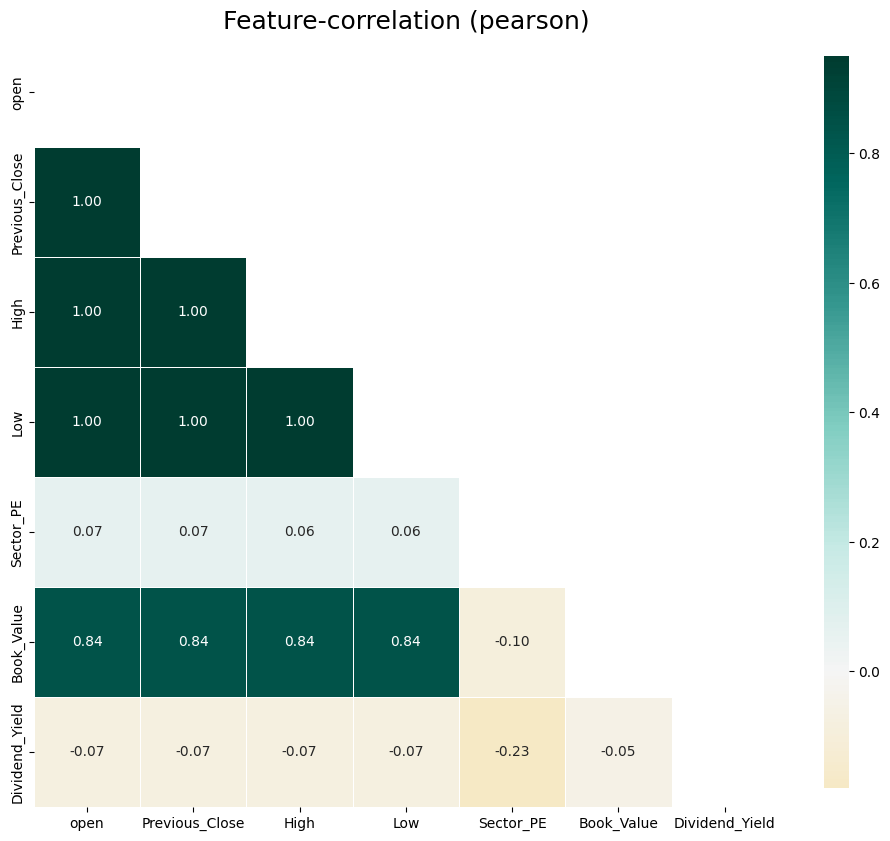

In [ ]:
klib.corr_plot(df41)

In [ ]:
klib.corr_interactive_plot(df41,split="neg").show()

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: xlabel='open', ylabel='Density'>

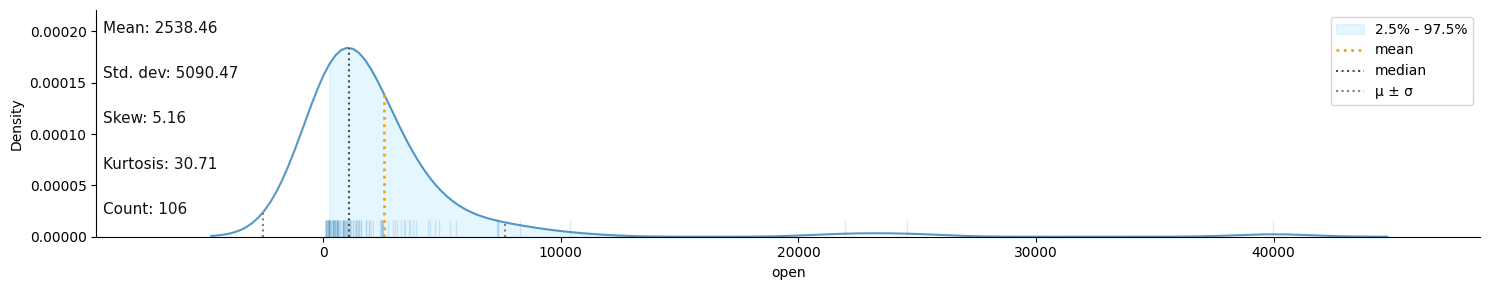

In [ ]:
klib.dist_plot(df41)

GridSpec(6, 6)

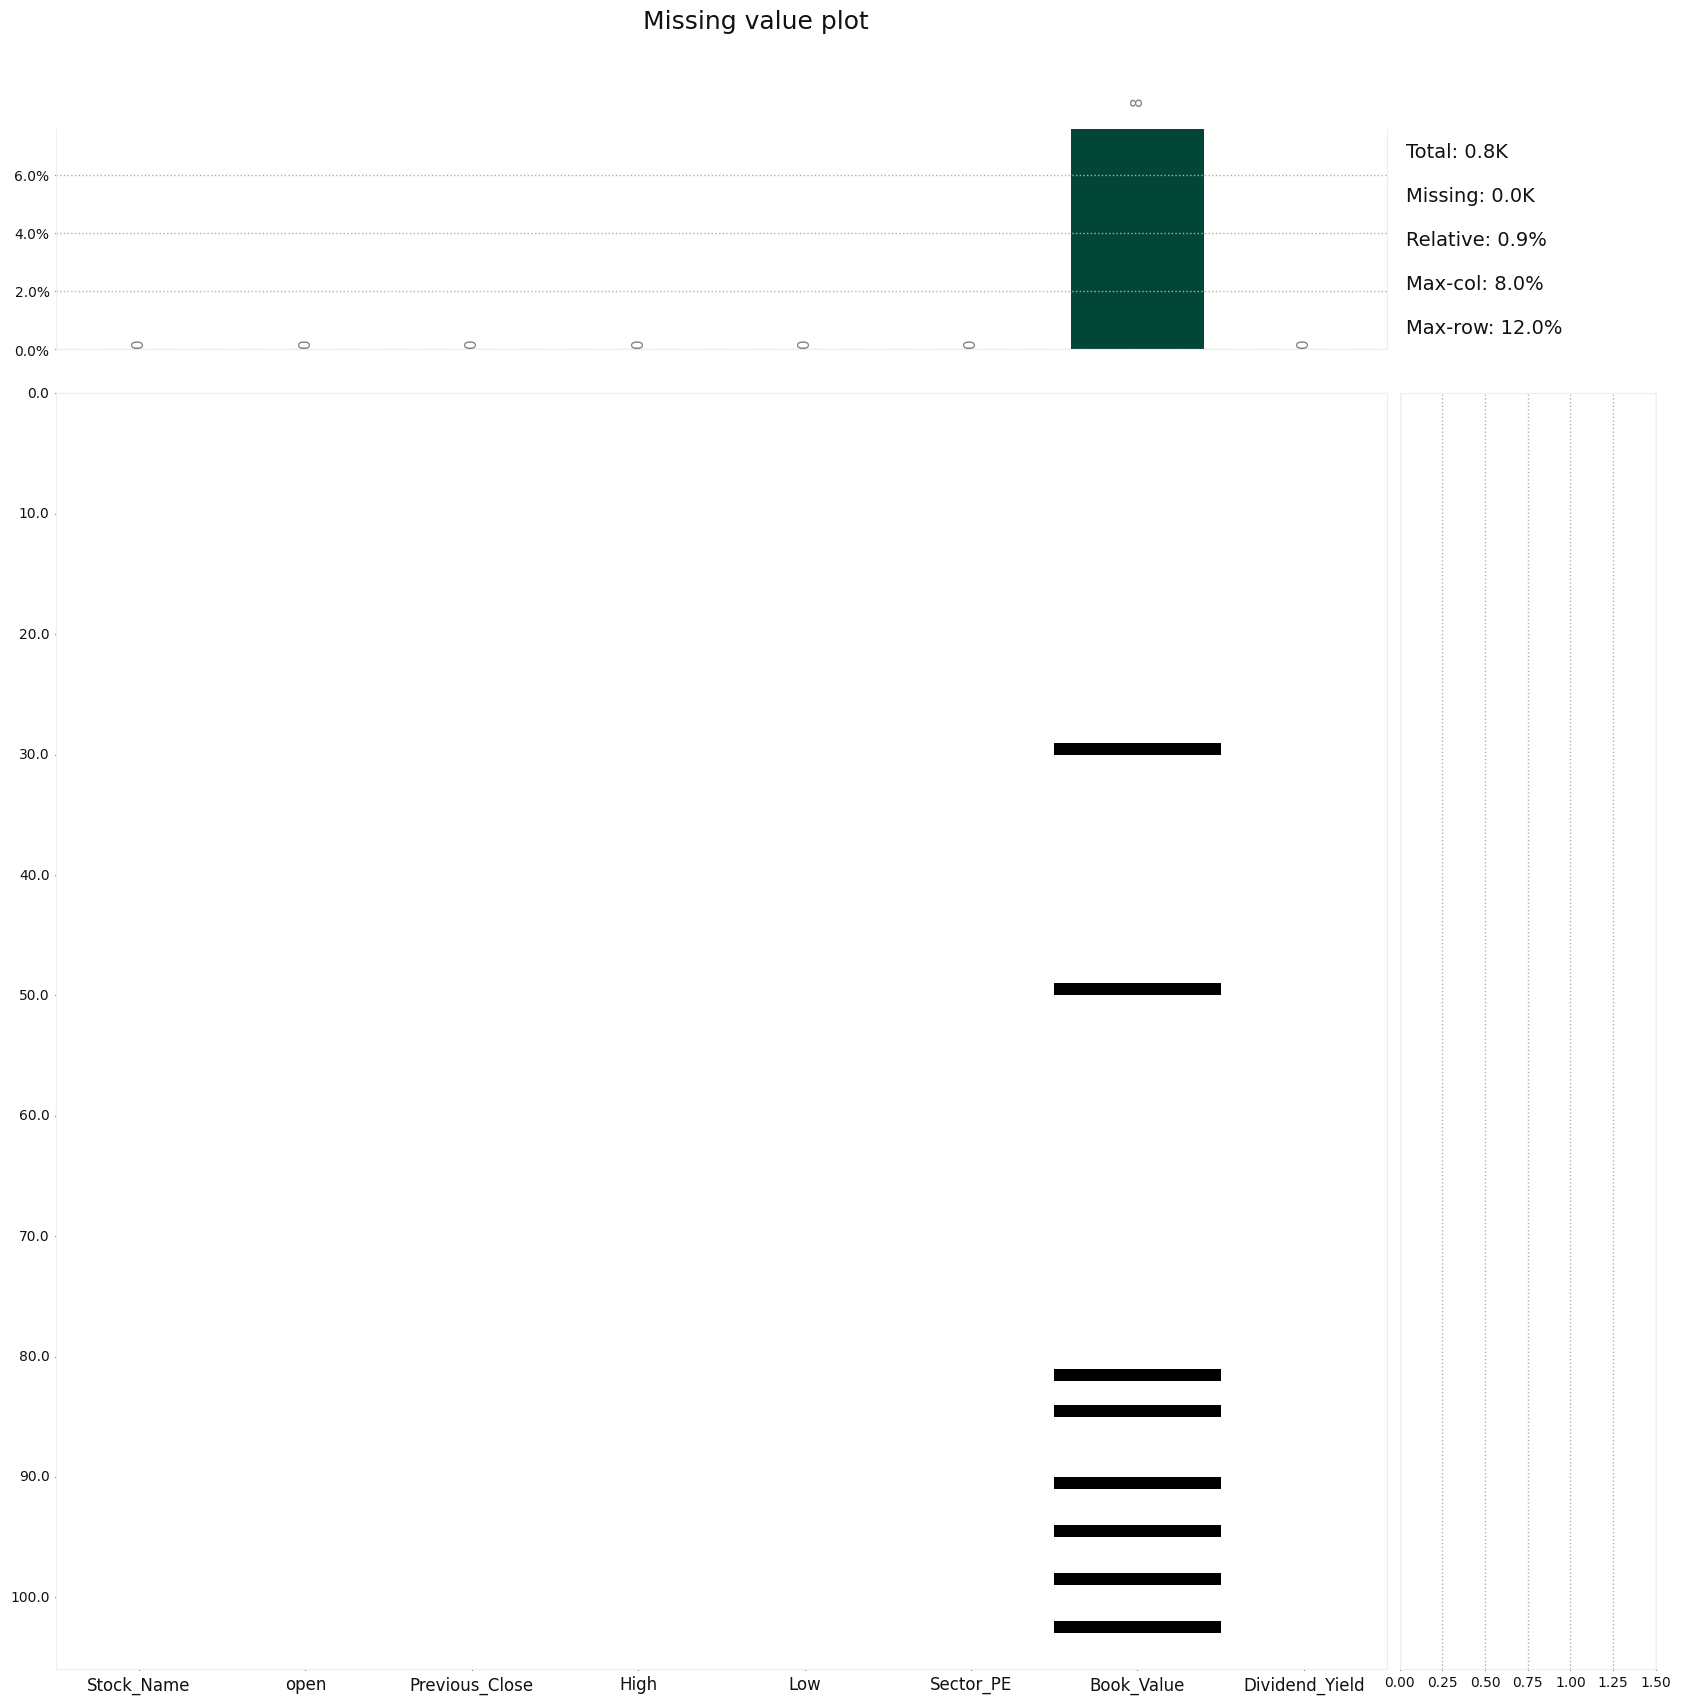

In [ ]:
klib.missingval_plot(df41)

<Axes: >

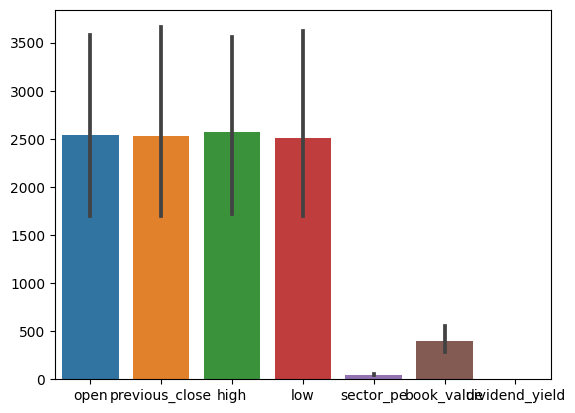

In [ ]:
import seaborn as sns
sns.barplot(df41)

<Axes: >

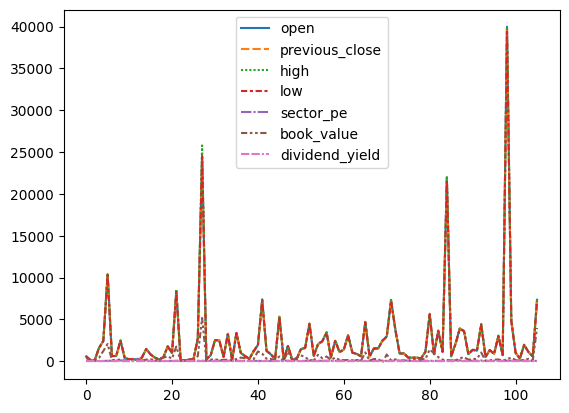

In [ ]:
sns.lineplot(df41)

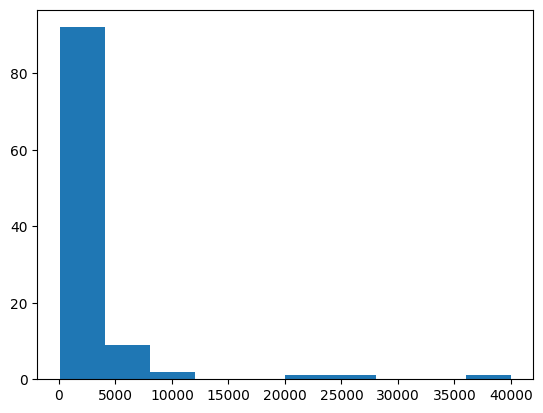

In [ ]:
plt.hist(df41['open'])
plt.show()

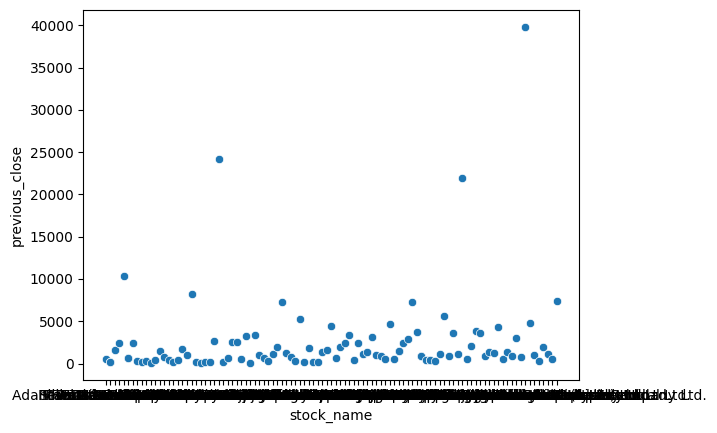

In [ ]:
sns.scatterplot(x='stock_name', y='previous_close', data=df41)
plt.show()

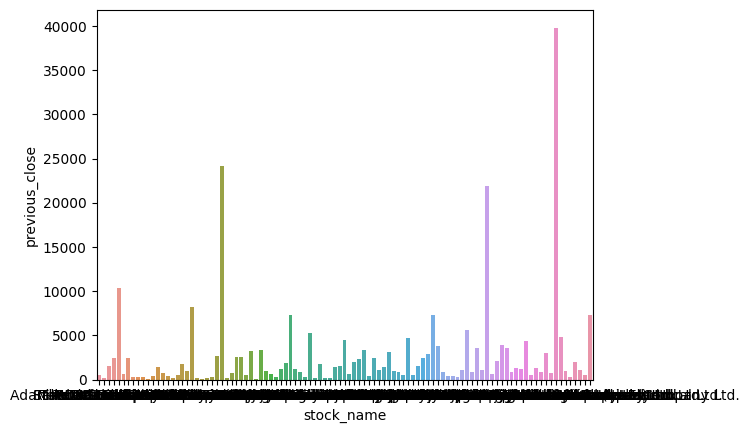

In [ ]:
sns.barplot(x='stock_name', y='previous_close', data=df41)
plt.show()

In [ ]:
pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e1abad24a71690c7c6cb96311a6fb6c3dc4a5597c9ccce6592c8e4e8776db419
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.

In [ ]:
import pandas_profiling

<ipython-input-78-6a00893fb3e1>:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [ ]:
pandas_profiling.ProfileReport(df, title="Pandas Profiling Report", explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]